In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Assiging the images to the directory

trafficdata="D:/dl project_new_new/Traffic_Sign_Detection/Traffic_Sign_Detection/archive/traffic"

In [3]:
data_dir =trafficdata

In [4]:
data = tf.keras.utils.image_dataset_from_directory(trafficdata) #allows to load your data from directory

Found 4230 files belonging to 10 classes.


In [5]:
#Resizing the image to desired size
batch_size = 32
img_height = 37
img_width = 37

In [6]:
#Splitting the data into Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4230 files belonging to 10 classes.
Using 3384 files for training.


In [7]:
#Splitting the data into Validation Data
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4230 files belonging to 10 classes.
Using 846 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Ahead only', 'Beware of icesnow', 'Bicycles crossing', 'Bumpy road', 'Children crossing', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'End no passing vehicle  3.5 tons', 'End of no passing']


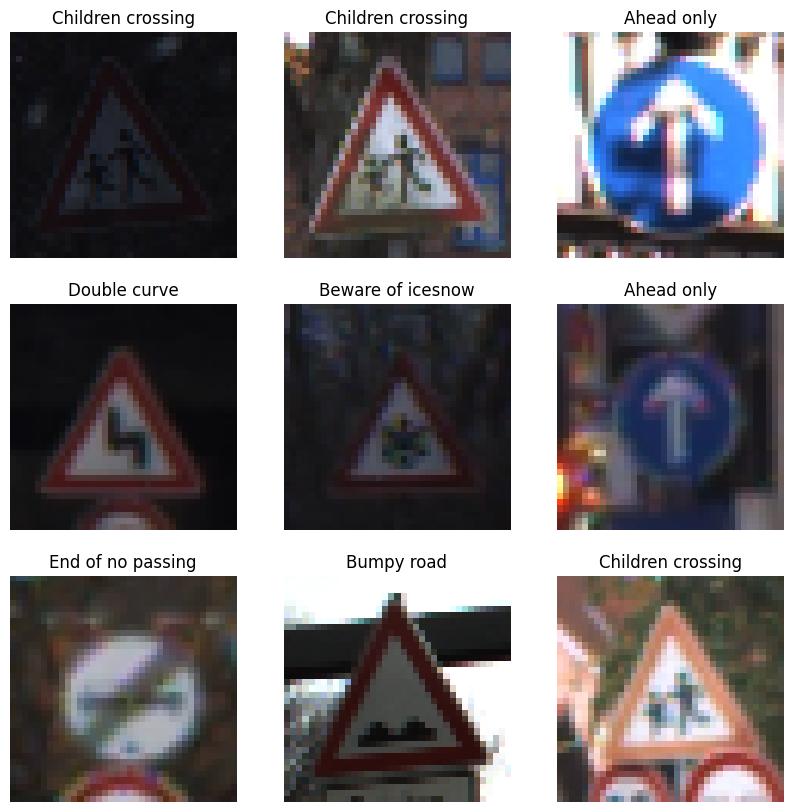

In [9]:
#Plotting 9 images in the dataset randomly
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 37, 37, 3)
(32,)


#Model-1 VGG-16

In [12]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model


In [13]:

_input = Input((37,37,3)) 


In [14]:

#Adding layers to the model

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)


In [15]:

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)



In [16]:
conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)



In [17]:
vgg16_model  = Model(inputs=_input, outputs=output)

##Model Compilation

In [18]:
# tell the model what cost and optimization method to use
vgg16_model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
  
)
# view the structure of the model
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 37, 37, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 37, 37, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 128)       147584    
                                                             

In [19]:
epochs=30
history = vgg16_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
106/106 [==============================] - 225s 2s/step - loss: 2.9568 - accuracy: 0.2778 - val_loss: 1.7434 - val_accuracy: 0.3322
Epoch 2/30
106/106 [==============================] - 195s 2s/step - loss: 2.0293 - accuracy: 0.3322 - val_loss: 2.1640 - val_accuracy: 0.3002
Epoch 3/30
106/106 [==============================] - 211s 2s/step - loss: 2.0939 - accuracy: 0.2905 - val_loss: 1.7099 - val_accuracy: 0.3605
Epoch 4/30
106/106 [==============================] - 253s 2s/step - loss: 1.7920 - accuracy: 0.3605 - val_loss: 1.6829 - val_accuracy: 0.3534
Epoch 5/30
106/106 [==============================] - 240s 2s/step - loss: 1.6418 - accuracy: 0.3963 - val_loss: 1.5489 - val_accuracy: 0.4007
Epoch 6/30
106/106 [==============================] - 192s 2s/step - loss: 1.6622 - accuracy: 0.3954 - val_loss: 1.6262 - val_accuracy: 0.3913
Epoch 7/30
106/106 [==============================] - 198s 2s/step - loss: 1.4606 - accuracy: 0.4403 - val_loss: 1.4830 - val_accuracy: 0.4090

##Plotting the Accuracy and Loss Graphs

Text(0.5, 1.0, 'Training and Validation Accuracy')

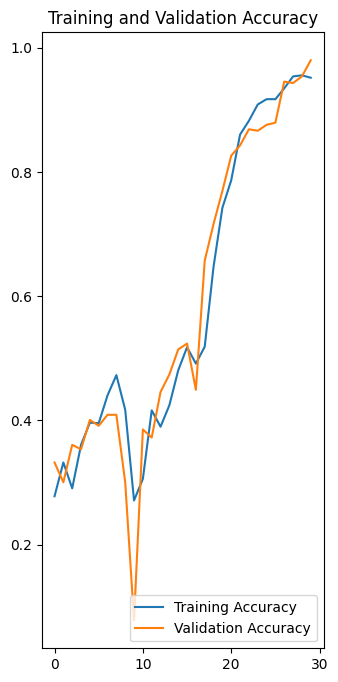

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


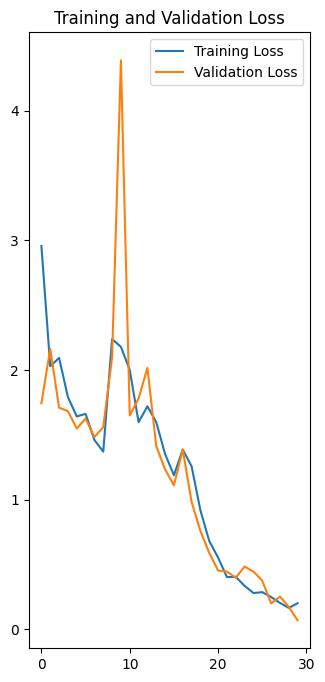

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [27]:
vgg16_model.save("D:/dl project_new_new/Traffic_Sign_Detection/Traffic_Sign_Detection/Traffic_Signs_Detection_vgg_2.h5")

#Model-2 ResNet 101

In [37]:
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.layers import Activation

In [38]:
convlayer=ResNet101V2(input_shape=(37,37,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

##Adding Layers to the model

In [39]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2, 2, 2048)        42626560  
                                                                 
 dropout_3 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 2048)              16779264  
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                      

In [40]:
opt=tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=opt)

#Training the model for 10 epochs

history=model.fit(train_ds,
                  validation_data=val_ds
                  ,epochs=30)

Epoch 1/30
106/106 [==============================] - 81s 689ms/step - loss: 3.1275 - accuracy: 0.3070 - val_loss: 2.2129 - val_accuracy: 0.5662
Epoch 2/30
106/106 [==============================] - 64s 600ms/step - loss: 1.6046 - accuracy: 0.5050 - val_loss: 1.3055 - val_accuracy: 0.6537
Epoch 3/30
106/106 [==============================] - 64s 599ms/step - loss: 1.3381 - accuracy: 0.5600 - val_loss: 1.1111 - val_accuracy: 0.6903
Epoch 4/30
106/106 [==============================] - 75s 707ms/step - loss: 1.1923 - accuracy: 0.6099 - val_loss: 1.0649 - val_accuracy: 0.7518
Epoch 5/30
106/106 [==============================] - 93s 873ms/step - loss: 1.0939 - accuracy: 0.6398 - val_loss: 1.1334 - val_accuracy: 0.7790
Epoch 6/30
106/106 [==============================] - 73s 685ms/step - loss: 1.0069 - accuracy: 0.6637 - val_loss: 1.2131 - val_accuracy: 0.7872
Epoch 7/30
106/106 [==============================] - 68s 645ms/step - loss: 0.9188 - accuracy: 0.6962 - val_loss: 1.4532 - val_ac

##Plotting the Accuracy and Loss Graphs

Text(0.5, 1.0, 'Training and Validation Accuracy')

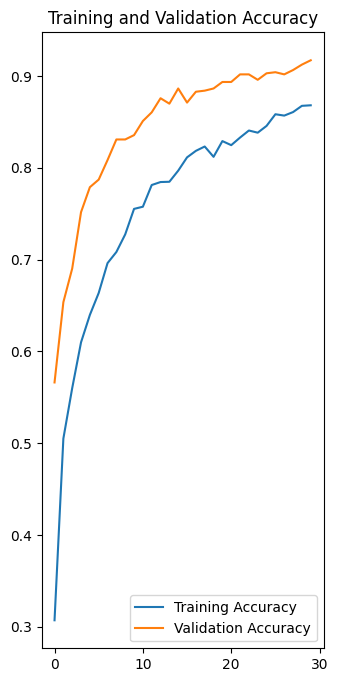

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


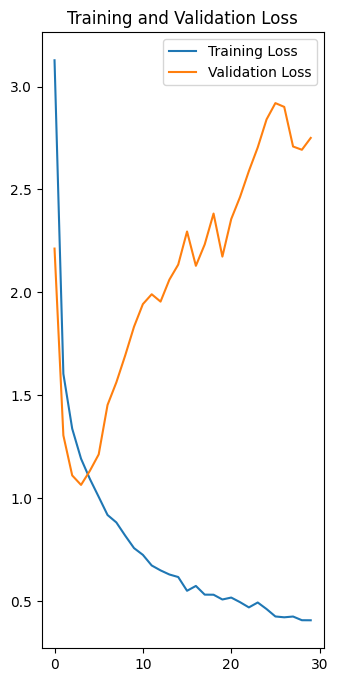

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save("Traffic_Signs_Detection_resnet88.h5")

#Comparison of Two Models

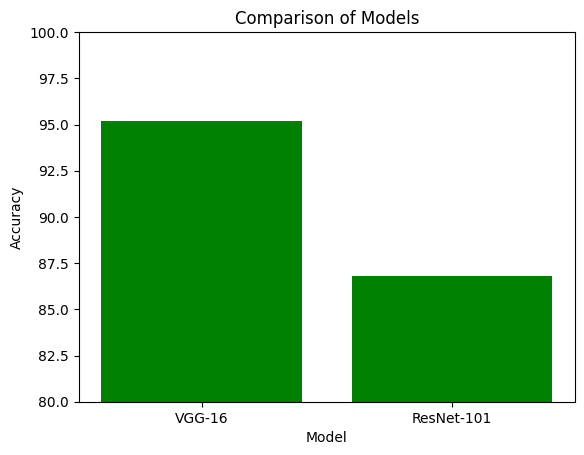

In [4]:
import matplotlib.pyplot as plt
  
# x-coordinates of left sides of bars 
left = [1, 2]
  
# heights of bars
height = [95.18, 86.82]
  
# labels for bars
tick_label = ['VGG-16', 'ResNet-101']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['green', 'green'])
  
# naming the x-axis
plt.xlabel('Model')

# naming the y-axis
plt.ylabel('Accuracy')

# plot title
plt.title('Comparison of Models')

plt.ylim(80,100)

# function to show the plot
plt.show()

In [5]:
import os
os.chdir(r"B:\Documents\MINI PROJECT REPORTS\SEM 6 MINI PROJECT\DL\Traffic_Sign_Detection\Traffic_Sign_Detection")
from keras.models import load_model
model = load_model("B:\Documents\MINI PROJECT REPORTS\SEM 6 MINI PROJECT\DL\Traffic_Sign_Detection\Traffic_Sign_Detection\Traffic_Signs_Detection_vgg_2.h5")

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\bhuva\AppData\Local\Temp\ipykernel_6592\25646318.py:4: SyntaxWarning: invalid escape sequence '\D'
  model = load_model("B:\Documents\MINI PROJECT REPORTS\SEM 6 MINI PROJECT\DL\Traffic_Sign_Detection\Traffic_Sign_Detection\Traffic_Signs_Detection_vgg_2.h5")


In [6]:
# Classes of trafic signs
classes = { 0: 'Ahead only',
    1: 'Beware of icesnow',
    2: 'Bicycles crossing',
    3: 'Bumpy road',
    4: 'Children crossing',
    5: 'Dangerous curve left',
    6: 'Dangerous curve right',
    7: 'Double curve',
    8: 'End of no passing',
    9: 'End no passing vehicle  3.5 tons' }

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((37,37))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    return image,Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
Predicted traffic sign is:  Dangerous curve right


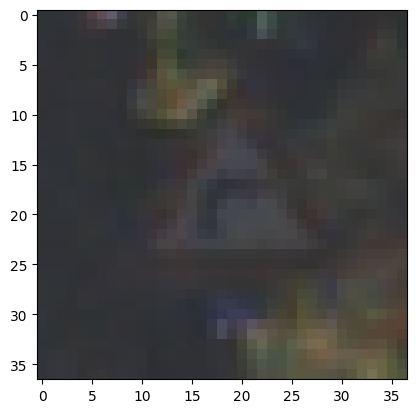

In [9]:
plot,prediction = test_on_img(r"B:\Documents\MINI PROJECT REPORTS\SEM 6 MINI PROJECT\DL\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (405).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted traffic sign is:  Ahead only


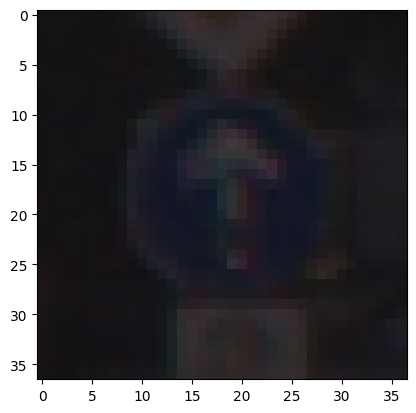

In [11]:
plot,prediction = test_on_img(r"B:\Documents\MINI PROJECT REPORTS\SEM 6 MINI PROJECT\DL\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (400).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 68ms/step
Predicted traffic sign is:  Beware of icesnow


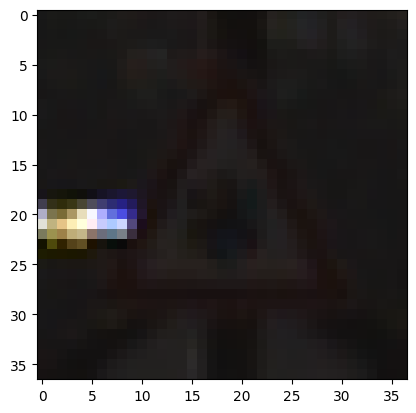

In [7]:
plot,prediction = test_on_img(r"D:\dl project_new_new\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (399).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 58ms/step
Predicted traffic sign is:  Double curve


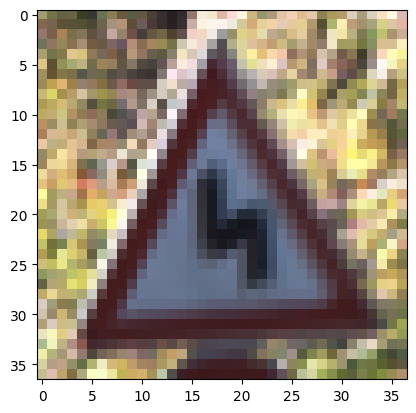

In [8]:
plot,prediction = test_on_img(r"D:\dl project_new_new\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (2).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 76ms/step
Predicted traffic sign is:  Bumpy road


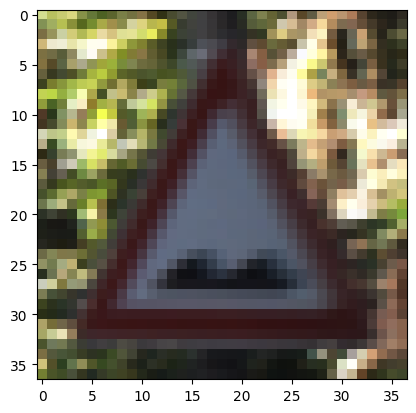

In [9]:
plot,prediction = test_on_img(r"D:\dl project_new_new\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (4).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 66ms/step
Predicted traffic sign is:  Bicycles crossing


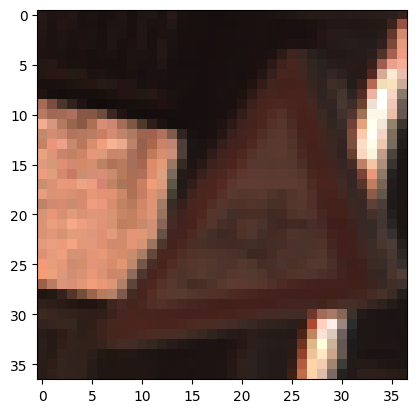

In [10]:
plot,prediction = test_on_img(r"D:\dl project_new_new\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (15).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 77ms/step
Predicted traffic sign is:  End of no passing


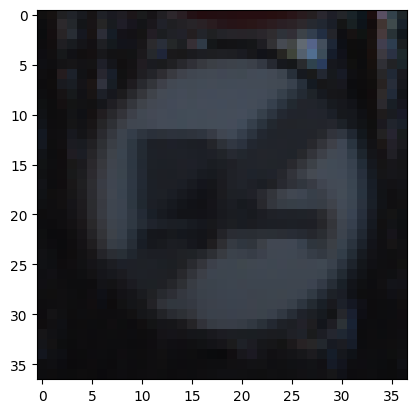

In [11]:
plot,prediction = test_on_img(r"D:\dl project_new_new\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (19).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 71ms/step
Predicted traffic sign is:  Children crossing


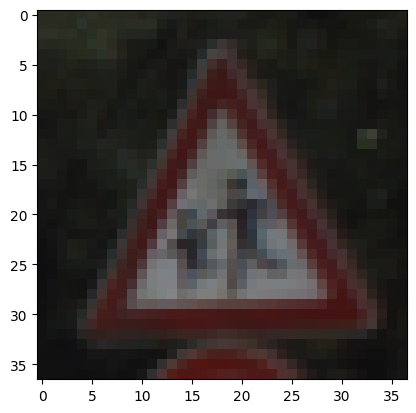

In [12]:
plot,prediction = test_on_img(r"D:\dl project_new_new\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (40).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 70ms/step
Predicted traffic sign is:  Dangerous curve left


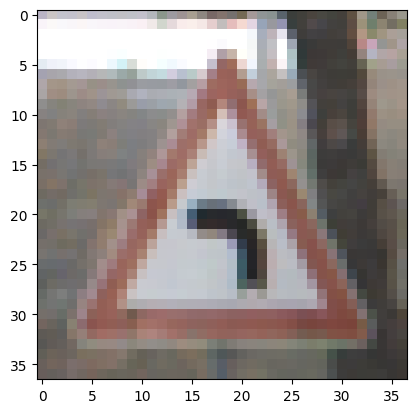

In [13]:
plot,prediction = test_on_img(r"D:\dl project_new_new\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (44).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 67ms/step
Predicted traffic sign is:  End no passing vehicle  3.5 tons


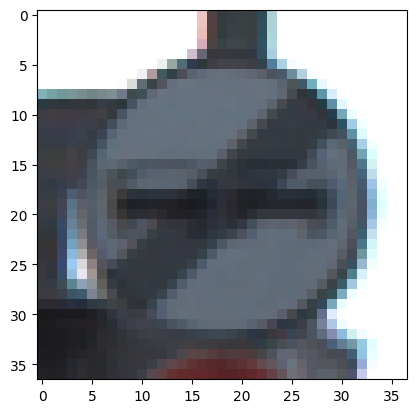

In [14]:
plot,prediction = test_on_img(r"D:\dl project_new_new\Traffic_Sign_Detection\Traffic_Sign_Detection\archive\ttrraaiinn\0001 (62).png")
s = [str(i) for i in prediction] 
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()